In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ratings = pd.read_csv('/content/drive/My Drive/ratings.csv')
movies = pd.read_csv('/content/drive/My Drive/movies.csv')

In [4]:
print(ratings)
print("#########################################")
ratings.info()

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]
#########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 

In [5]:
print(movies)
print("###################################")
movies.info()

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
sum(ratings['movieId']==1)

215

In [9]:
ratings[ratings['movieId']==1]['rating'].mean()

3.9209302325581397

In [10]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
ratings['rating'].nunique()

10

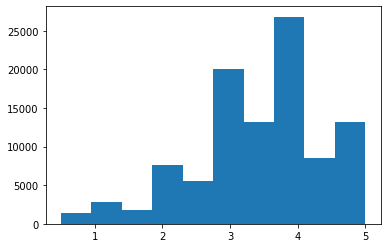

In [12]:
_ = plt.hist(ratings['rating'],bins=10)

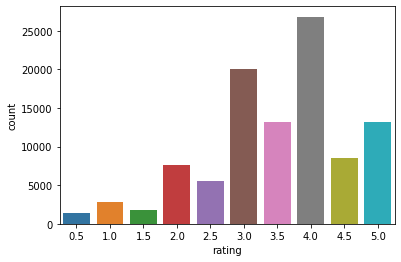

In [13]:
sns.countplot(x='rating',data=ratings)

In [14]:
ratings['userId'].nunique()


610

In [15]:
movies['title'].nunique()

9737

In [16]:
sum(movies['title'].value_counts()==2)

5

In [17]:
movies['title'].value_counts()==2

Emma (1996)                                True
War of the Worlds (2005)                   True
Confessions of a Dangerous Mind (2002)     True
Eros (2004)                                True
Saturn 3 (1980)                            True
                                          ...  
Lost and Delirious (2001)                 False
Rape Me (Baise-moi) (2000)                False
Alice (1990)                              False
Another Woman (1988)                      False
Andrew Dice Clay: Dice Rules (1991)       False
Name: title, Length: 9737, dtype: bool

In [18]:
data = pd.merge(ratings,movies,on='movieId')
data.head(500)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
495,369,47,3.5,1237083091,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
496,370,47,3.5,1159162973,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
497,372,47,5.0,874417240,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
498,373,47,5.0,846829997,Seven (a.k.a. Se7en) (1995),Mystery|Thriller


In [19]:
data['title'].nunique()

9719

In [20]:
data.groupby('title')['rating'].count()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [21]:
stats = pd.DataFrame(data.groupby('title')['rating'].mean(),columns = ['rating'])
stats

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [22]:
stats['count'] = data.groupby('title')['rating'].count()
stats

,rating,count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


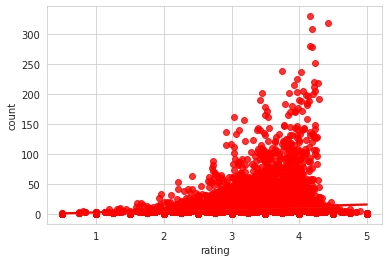

In [23]:
sns.set_style('whitegrid')
sns.regplot(x='rating',y='count',data = stats,color='r')

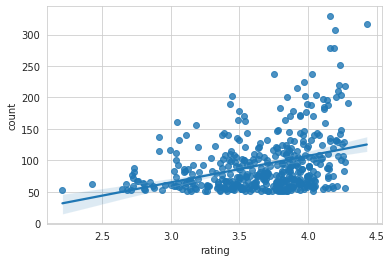

In [24]:
sns.regplot(x='rating',y='count',
            data = stats[stats['count']>50])

In [25]:
stats.sort_values(by='count',ascending=False).head(10)

,rating,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [26]:
pivot = data.pivot_table(index='userId',
                         columns='title',
                         values='rating')
pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [27]:
pivot['Matrix, The (1999)'].head(10)

userId
1     5.0
2     NaN
3     NaN
4     1.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    0.5
Name: Matrix, The (1999), dtype: float64

In [28]:
inp = 'Matrix, The (1999)'
sim_inp = pivot.corrwith(pivot[inp])
sim_inp

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.049146
xXx (2002)                                   0.495251
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                       -0.006953
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [29]:
sim_inp = pd.DataFrame(sim_inp,columns = ['similarity'])
sim_inp['count'] = stats['count']
sim_inp.head()

,similarity,count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


In [30]:
sim_inp[sim_inp['count']>30].sort_values(by = 'similarity',ascending=False)

,similarity,count
title,,
"Matrix, The (1999)",1.000000,278
Zootopia (2016),0.760610,32
Life of Pi (2012),0.710196,31
Tommy Boy (1995),0.674887,50
Iron Man 3 (2013),0.657786,32
...,...,...
Arachnophobia (1990),-0.387551,53
Insomnia (2002),-0.389663,33
Miracle on 34th Street (1994),-0.399772,38
